In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For handling class imbalance
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithms for building model
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [84]:
#Change path as required
df=pd.read_csv('/kaggle/input/bank-full/bank-full.csv',sep=';')

In [85]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
df.shape

(45211, 17)

In [87]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [89]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [90]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
age,0
day,0
poutcome,0
previous,0
pdays,0
campaign,0
duration,0
month,0
contact,0


In [91]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [92]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [93]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------------------------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----------------------------------------------------------------------

In [94]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [95]:

# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
poutcome,36959,81.75
contact,13020,28.80
education,1857,4.11
job,288,0.64
month,0,0.00
previous,0,0.00
pdays,0,0.00
campaign,0,0.00
duration,0,0.00


In [96]:
#Checking for unique entries in categorical variables
for col in df.columns:
    if col not in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
      print(f"Unique entries in {col} : {df[col].unique()}")

Unique entries in job : ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique entries in marital : ['married' 'single' 'divorced']
Unique entries in education : ['tertiary' 'secondary' nan 'primary']
Unique entries in default : ['no' 'yes']
Unique entries in housing : ['yes' 'no']
Unique entries in loan : ['no' 'yes']
Unique entries in contact : [nan 'cellular' 'telephone']
Unique entries in month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique entries in poutcome : [nan 'failure' 'other' 'success']
Unique entries in y : ['no' 'yes']


In [97]:
#Checking for no of unique entries in categorical variables
for col in df.columns:
    if col not in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
      print(f"No of Unique entries in {col} : {len(df[col].unique())}")

No of Unique entries in job : 12
No of Unique entries in marital : 3
No of Unique entries in education : 4
No of Unique entries in default : 2
No of Unique entries in housing : 2
No of Unique entries in loan : 2
No of Unique entries in contact : 3
No of Unique entries in month : 12
No of Unique entries in poutcome : 4
No of Unique entries in y : 2


In [98]:
#convert "student and housemaid to unemployed
for entry in df['job']:
    if(entry=='student' or entry=='housemaid'):
         entry ='unemployed'

In [99]:
# Check for nan values in numerical columns.
numerical_variables=[var for var in df.columns if var not in categorical_variables]
for col in numerical_variables:
    print(f"No of NaN entries in {col} column: {np.sum((df[col]=='unknown'))}")

No of NaN entries in age column: 0
No of NaN entries in balance column: 0
No of NaN entries in day column: 0
No of NaN entries in duration column: 0
No of NaN entries in campaign column: 0
No of NaN entries in pdays column: 0
No of NaN entries in previous column: 0


In [100]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64
------------------------------------------------------------------------------------------
contact
cellular     29285
telephone     2906
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [101]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [102]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [103]:
df.shape

(45211, 16)

In [104]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


In [106]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [107]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
__________________________________________________________________________________________
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
__________________________________________________________________________________________
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
__________________________________________________________________________________________
default
no     44396
yes      815
Name: count, dtype: int64
__________________________________________________________________________________________
housing
yes    25130
no     20081
Name: count, dtype: int64
____________________________________________________

In [108]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [109]:

## One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [110]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  int64  
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  y                  45211 non-null  int64  
 14  job_blue-collar    45211 non-null  bool   
 15  job_entrepreneur   45211 non-null  bool   
 16  job_housemaid      452

In [111]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,1,0,2143,1,0,1,5,261,1,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,44.0,0,0,0,29,1,0,1,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,33.0,1,0,0,2,1,1,1,5,76,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,47.0,1,0,0,1506,1,0,1,5,92,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,33.0,0,0,0,1,0,0,1,5,198,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [112]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

In [113]:
!pip install imblearn

In [114]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

In [115]:

# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [116]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


In [117]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Set Evaluation:

Confusion Matrix:
 [[29466  2548]
 [ 3463 28398]]
Accuracy:  0.905894324853229
Precision:  0.9176630259161119
Recall:  0.8913091240074071
F1 Score:  0.9042941073447226
ROC AUC Score:  0.9058594723554246


Test Set Evaluation:

Confusion Matrix:
 [[7252  656]
 [ 873 7188]]
Accuracy:  0.9042519882271902
Precision:  0.9163691993880673
Recall:  0.8917007815407517
F1 Score:  0.9038667085822069
ROC AUC Score:  0.9043734054390659


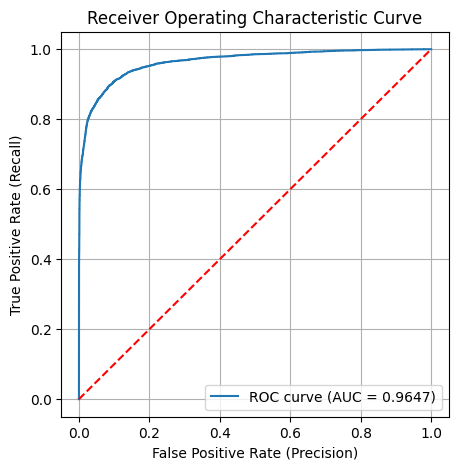

In [118]:
# Fit Logistic Regression model to the training set
logistic_regression = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)
logistic_regression.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)

# Predict probabilities for ROC curve (for the test set)
y_test_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate and print evaluation metrics for the training set
print("Training Set Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("F1 Score: ", f1_score(y_train, y_train_pred))
print("ROC AUC Score: ", roc_auc_score(y_train, y_train_pred))

print("\n" + "="*50 + "\n")

# Calculate and print evaluation metrics for the test set
print("Test Set Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_test_pred))


# Plotting the ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
